<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Shironin-Igor-branch/Shironin%20Igor/%D1%84%D0%B8%D0%BD%D0%B0%D0%BB3_%D0%B4%D1%83%D0%B6%D0%BA%D0%B8%22%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_3%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Создание модели нейросети для распознавания очков по виду дужек.**
  
   Задача стажера: разработка модели нейросети, способной классифицировать очки по видам дужек - ободковые, безободковые, леска. Получение изображений с сайта и распределение по требуемым категориям для дальнейшего обучения модели.
(По заданным категориям качаем с сайта изображения и размещаем по 3 папкам, потом запускаем модель.)

Были получены необходимые файлы с изображениями и размещены в папках ['Ободки', 'Леска', 'Втулки'] на гугл диске. Для удобства последующей загрузки в Сolab папки были заархивированны в архив task3.zip. Далее было принято решение использовать модель нейронной сети из курса УИИ :

 Базовый блок | Сверточные нейронные сети

Загружены стандартные библиотеки , необходимые для подготовки выборок и построения модели.

Видим что общая база фотографий мала для качественного обучения. Поэтому необходимо ее увеличить за счет аугментации.

Для аугментации бало выбрано несколько методов, которые по моему мнению не должны были повлиять на качество обучения.

Угол поворота не более 10 градусов иначе при обрезке черных углов и восстановления размера изображения часть фото и информации будет потеряна
Яркость и Контрастность с коэфициентом изменения не более 40 %
Отражение
Для получения аугментированного изображения была написана функция рандомного применения изменений

Для подготовки выборок был использован метод train_test_split.

Этот метод позволяет получить пропорциональные выборки в соответствии с классами изображений. И подаваемые в обучение модели данные будут содержать все классы.

Т.к. база для обучения не большая, то чтобы зафиксировать лучшие веса модели необходимо было использовать метод callback. Этод метод был использован для фиксации лучшей модели - ModelCheckpoint и остановки обучения в случии не наступления улучшения модели - EarlyStopping.

Для этого была использованна библиотека keras.callbacks

Чтобы пользоваться обученной моделью и не запускать обучение модели каждый раз настраиваем в callback сохранение лучшей модели best_model2.h5 на гугл диск.

для загрузки модели импортируем модуль load_model из библиотеки tensorflow.keras.models

Используем модуль pickle для сохранения и последующего использования истории обнучения

# Библиотеки

In [ ]:
# Работа с массивами
import numpy as np
import random                             # Генерация случайных чисел
import pandas as pd
# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential
# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# Оптимизатор
from tensorflow.keras.optimizers import Adam
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Подключение модуля для загрузки данных из облака
import gdown
# Инструменты для работы с файлами
import os
# Отрисовка графиков
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance       # Инструменты для работы с изображениями
import math                               # Математические функции
import  requests, zipfile
!pip install GitPython
from sklearn.model_selection import train_test_split
# Рисование графиков в ячейках Colab
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


# Загрузка изображений

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# открываем доступ к файлу и получаем ссылку
# https://drive.google.com/file/d/1Kul4G02U2g18rmunwdelNaLOMde6tBNC/view?usp=sharing
f_1 = '1Kul4G02U2g18rmunwdelNaLOMde6tBNC'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'task3.zip'

In [ ]:
# Разархивация датасета в директорию 'content/TOTAL_folder'
!unzip -qo "task3.zip" -d /content/img

Втулки/:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/),
         continuing with "central" filename version
Втулки/ana-hickmann-ah1279-02a-s2-1 (2).jpg:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/ana-hickmann-ah1279-02a-s2-1 (2).jpg),
         continuing with "central" filename version
Втулки/ana-hickmann-ah1279-02a-s2-2 (1).jpg:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/ana-hickmann-ah1279-02a-s2-2 (1).jpg),
         continuing with "central" filename version
Втулки/andy-wolf-davis-cd-s2-1  (2).jpg:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/andy-wolf-davis-cd-s2-1  (2).jpg),
         continuing with "central" filename version
Втулки/andy-wolf-davis-cd-s2-1.jpg:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/andy-wolf-davis-cd-s2-1.jpg),
         continuing with "central" filename version
Втулки/blancia-bc209-c3-s2-1 (1).jpg:  mismatching "local" filename (╨Т╤В╤Г╨╗╨║╨╕/blancia-bc209-c3-s2-1 (1).jpg),
         continuing with "central" filename version
Втулки/blancia-bc209-c3-s2-2 (2)

In [ ]:
!rm /content/img/Втулки/desktop.ini
!rm /content/img/Леска/desktop.ini
!rm /content/img/Ободки/desktop.ini

In [ ]:

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/img/'
os.listdir(IMAGE_PATH)

['Ободки', 'Леска', 'Втулки']

# Cоздание списков путей к файлам и меток к ним

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH)) # можно не сортировать CLASS_LIST = os.listdir(IMAGE_PATH)
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Втулки', 'Леска', 'Ободки']


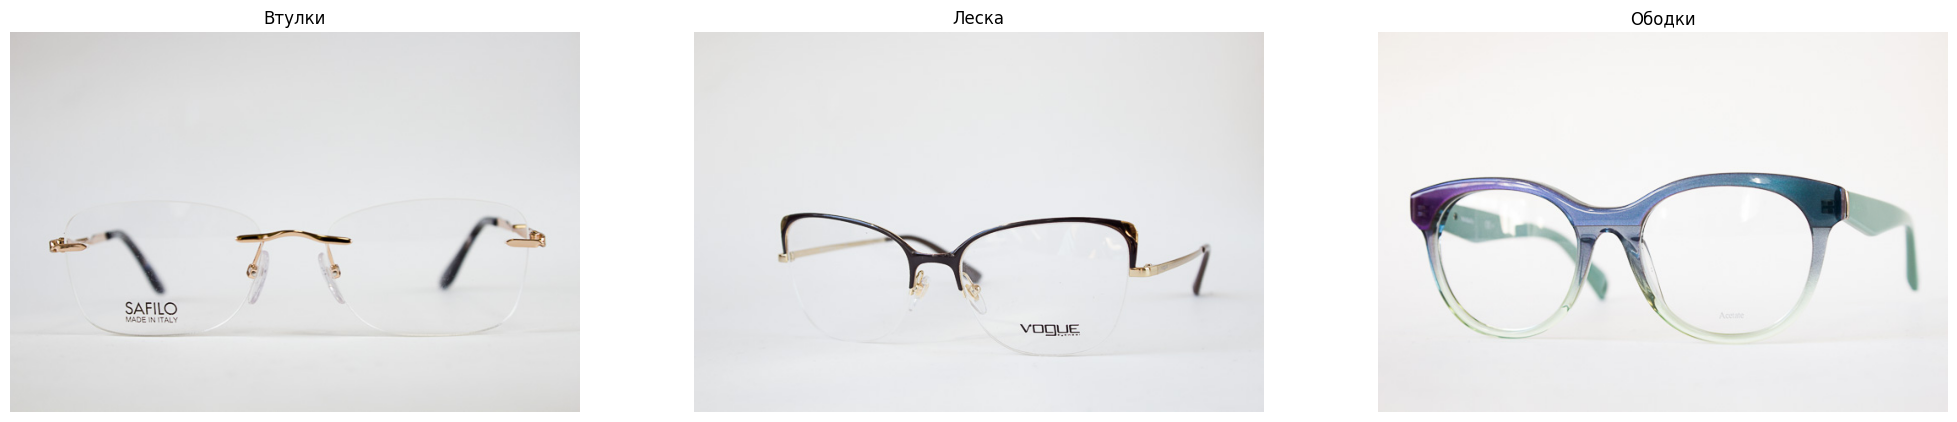

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = path + random.choice(os.listdir(path))
    # Отображение фотографий
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам


for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)
    print('Общий размер базы для обучения:', len(data_labels))

Размер класса Втулки составляет 410 фото
Общий размер базы для обучения: 410
Размер класса Леска составляет 502 фото
Общий размер базы для обучения: 912
Размер класса Ободки составляет 502 фото
Общий размер базы для обучения: 1414


# просмотр фото

(675, 450)
2


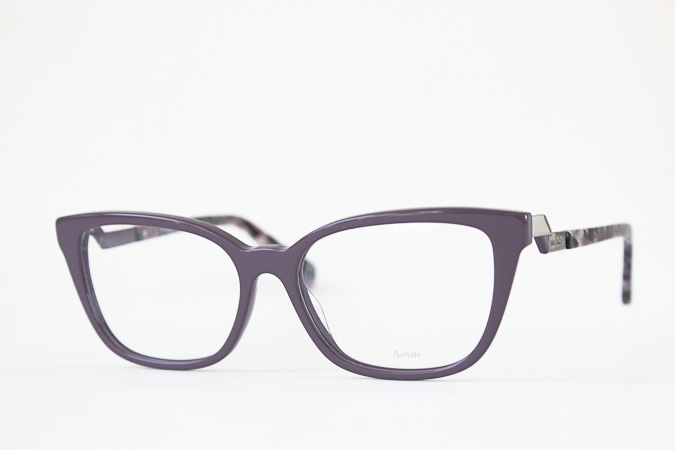

In [ ]:
img  = Image.open(data_files[1300])
print(img.size)
print(data_labels[1300])
img

# Получение списка файлов data_img c размерностью 128х64

In [ ]:
IMG_WIDTH           = 128       # Ширина изображения для нейросети
IMG_HEIGHT          = 64      # Высота изображения для нейросети

In [ ]:
data_img = []
for i in range(len(data_files)):
  img_old  = Image.open( data_files[i])
  img = img_old.resize((IMG_WIDTH ,IMG_HEIGHT ))
  data_img.append(img)

In [ ]:
img1 = data_img[5]

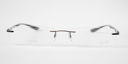

In [ ]:
img1

# Создание аугментированного списка изображений

In [ ]:
# Сравнение двух изображений
def show_image_pair(img1, img2): #
    # Cоздание полотна для рисования двух изображений
    fig, axs = plt.subplots(1, 2, figsize=(4, 2))
    # Исходное изображение
    axs[0].imshow(img1)
    axs[0].axis('off')
    # Модифицированное изображение
    axs[1].imshow(img2)
    axs[1].axis('off')
    # Вывод изображений
    plt.show()

In [ ]:
# подрезка изображения чтобы небыло черных углов
def rotated_rect(w,                       # Ширина изображения
                 h,                       # Высота изображения
                 angle                    # Угол поворота в градусах
                 ):
    angle = math.radians(angle)
    width_is_longer = w >= h
    side_long, side_short = (w,h) if width_is_longer else (h,w)

    sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))

    if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
        x = 0.5 * side_short
        wr, hr = (x/sin_a, x/cos_a) if width_is_longer else (x/cos_a, x/sin_a)
    else:
        cos_2a = cos_a*cos_a - sin_a*sin_a
        wr, hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

    return wr, hr # Ширина и Высота прямоугольника обрезки

In [ ]:
 # функция поворота на случайный угол (в градусах) с учетом необходимой обрезки
 # + востановление размеров
def random_rot(x,      # Подаваемое изображение
               ang                        # Максимальный угол поворота
               ):
    # Случайное значение угла в диапазоне [-ang, ang]
  a = random.uniform(-1., 1.) * ang
    # Вращение картинки с расширением рамки
  r = x.rotate(a, expand=True)
    # Вычисление размеров прямоугольника обрезки максимальной площади
    # для размеров исходной картинки и угла поворота в градусах
  crop_w, crop_h = rotated_rect(x.width, x.height, a)
    # Обрезка повернутого изображения и возврат результата
  w, h = r.size
  y = r.crop(((w - crop_w)*0.5, (h - crop_h)*0.5,
                   (w + crop_w)*0.5, (h + crop_h)*0.5))
  y = y.resize((x.width,x.height))
  return y              # Полученное изображение

In [ ]:
from PIL import ImageEnhance

In [ ]:
def random_contrast(x,                    # Подаваемое изображение
                    level                 # Максимальное отклонение коэффициента контраста от нормы - число от 0. до 1.
                    ):
    enh = ImageEnhance.Contrast(x)        # Создание экземпляра класса Contrast
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент контраста из указанного интервала
    return enh.enhance(factor)            # Получаемое изображение с изменением коэффициента контраста

In [ ]:
def random_brightness(x,                  # Подаваемое изображение
                      level               # Максимальное отклонение коэффициента яркости от нормы - число от 0. до 1.
                      ):
    enh = ImageEnhance.Brightness(x)      # Создание экземпляра класса Brightness
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент яркости из указанного интервала
    return enh.enhance(factor)             # Получаемое изображение с изменением коэффициента яркости

In [ ]:
def  trans_img(img1) :
  img2 = img1.transpose(Image.FLIP_LEFT_RIGHT) # отражение
  return img2

In [ ]:
ang = 10
level = 0.4

In [ ]:
def aug (img, ang, level):
    # Cоздание списка модификаций
  mod_oper = [random_rot(img,ang),
                trans_img(img),
                random_contrast(img,level),
                random_brightness(img,level)]

    # Cлучайное количество изменений из списка; минимум одно изменение
  mod_count = random.randrange(len(mod_oper) + 1)

    # Случайный отбор индексов изменений в количестве mod_count без повторений
  mod_list = random.sample(range(len(mod_oper)), mod_count)

    # Применение модификаций по индексам из mod_list
  for mod_index in mod_list:
        img = mod_oper[mod_index]

    # Возврат результата
  return img

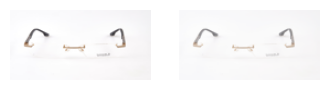

In [ ]:
img1 = data_img[100]
img2 = aug(img1,ang, level)
show_image_pair(img1, img2)

In [ ]:
# функция для получения списка из n аугментированых изображений + родное
# со списком одинаковых меток например '50.jpg'

def aug_list(img, n, mark):
  img_list = [img]
  a_list = [mark]
  for i in range(n):
    img_list += [aug(img,ang,level)]
    a_list.append(mark)
  return img_list , a_list

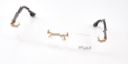

In [ ]:
n = 5
a,b = aug_list(img1,n,5)
a[3]

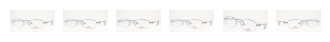

[2, 2, 2, 2, 2, 2]

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(4, 2))

a,b  = aug_list(data_img[1000],5,data_labels[1000])
for i in range(6):
    # Исходное изображение
  axs[i].imshow(a[i])
  axs[i].axis('off')

#     # Вывод изображений
plt.show()
b

In [ ]:
def aug_list_n (img_list,mark_list, n) :
  data_x = []
  data_y = []
  for i in range(len(img_list )):
    list_img ,list_a = aug_list(img_list[i],n-1,mark_list[i])
    for j in range(len(list_img )):
       data_x.append(list_img[j])
       data_y.append(list_a[j])
  return data_x, data_y

In [ ]:
data_x, data_y = aug_list_n (data_img,data_labels, n)


In [ ]:
print(data_x[1000].size)
print(len(data_x))
data_x[1000:1005]

(128, 64)
7070


[<PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>]

In [ ]:
print(len(data_y))
data_y[1000]

7070


0

# Подготовка выборок

In [ ]:
print(data_x[1000].size)

# Преобразовать список в массив
data_images = np.array([np.array(img) for img in data_x])/255

# Проверить размерность
print(data_images.shape)

(128, 64)
(7070, 64, 128, 3)


In [ ]:
# from tensorflow.keras.preprocessing import image
# data_images = []
# for i in range(len(data_files)):
#   # изменение размера и нормализация
#   img  = np.array(image.load_img(data_files[i], target_size=(128, 64)))/255
# # создание общего спика изображений
#   data_images +=[img]

In [ ]:

print(data_images[600].shape)
print(data_y[600])
data_images[600]

(64, 128, 3)
0


array([[[0.98431373, 0.99215686, 0.98823529],
        [0.98431373, 0.98823529, 0.98823529],
        [0.98431373, 0.98823529, 0.98431373],
        ...,
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.98431373, 0.98823529, 0.98823529],
        [0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98431373, 0.98431373],
        ...,
        [0.98431373, 0.98431373, 0.98431373],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98431373, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        ...,
        [0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373]],

       ...,

       [[0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0

In [ ]:
data_images[1].shape

(64, 128, 3)

In [ ]:
x_data = np.array(data_images)          # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_y)            # Перевод общего списка меток класса в numpy-массив
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

Общий массив данных изображений следующей формы: (7070, 64, 128, 3)
Общий массив меток классов следующей формы: (7070,)


In [ ]:
# Преобразование данных в формат one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data, 3)
y_data[5]

array([1., 0., 0.], dtype=float32)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.2, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---
print(f'Общий массив данных изображений следующей формы: {x_train.shape}')
print(f'Общий массив меток классов следующей формы: {y_train.shape}')
print(f'Общий массив данных проверочных изображений следующей формы: {x_val.shape}')
print(f'Общий массив проверочных меток классов следующей формы: {y_val.shape}')
print(f'Общий массив тестовых данных  изображений следующей формы: {x_test.shape}')
print(f'Общий массив тестовых меток классов следующей формы: {y_test.shape}')


Общий массив данных изображений следующей формы: (5656, 64, 128, 3)
Общий массив меток классов следующей формы: (5656, 3)
Общий массив данных проверочных изображений следующей формы: (1414, 64, 128, 3)
Общий массив проверочных меток классов следующей формы: (1414, 3)
Общий массив тестовых данных  изображений следующей формы: (707, 64, 128, 3)
Общий массив тестовых меток классов следующей формы: (707, 3)


# Cоздание и обучение модели

In [ ]:
EPOCHS              = 150       # Число эпох обучения
BATCH_SIZE          = 24                    # Размер батча для обучения модели
OPTIMIZER           = Adam(0.0001)
CLASS_COUNT         = 3

IMG_CHANNELS        = 3

In [ ]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH  , IMG_CHANNELS)))
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation='relu'))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation='relu'))
# Выходной полносвязный слой с количеством нейронов по количесту классов
model_conv.add(Dense(CLASS_COUNT, activation='softmax'))

In [ ]:
    # Вывод сводки
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 256)      7168      
                                                                 
 batch_normalization (Batch  (None, 64, 128, 256)      1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 256)      590080    
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 42, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 42, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 42, 256)       1

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model("/content/drive/MyDrive/model/model_conv.h5")

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Создание обратного вызова EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/model/' + 'best_model3.h5', monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)

In [ ]:
model_conv.compile(optimizer=OPTIMIZER,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import load_model

model_conv = load_model("/content/drive/MyDrive/model/best_model3.h5")

In [ ]:
 # Обучение модели с заданными параметрами
history = model_conv.fit( x_train,y_train,
                        epochs=EPOCHS  ,
                      batch_size=BATCH_SIZE,
                        validation_data=(x_val, y_val),callbacks=[checkpoint, early_stopping])

Epoch 1/150
236/236 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9896
Epoch 1: val_accuracy improved from -inf to 0.49364, saving model to /content/drive/MyDrive/model/best_model3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


236/236 [==============================] - 67s 206ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.9330 - val_accuracy: 0.4936
Epoch 2/150
236/236 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9942
Epoch 2: val_accuracy improved from 0.49364 to 0.81330, saving model to /content/drive/MyDrive/model/best_model3.h5
236/236 [==============================] - 52s 219ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.4105 - val_accuracy: 0.8133
Epoch 3/150
236/236 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9912
Epoch 3: val_accuracy improved from 0.81330 to 0.98939, saving model to /content/drive/MyDrive/model/best_model3.h5
236/236 [==============================] - 54s 227ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0530 - val_accuracy: 0.9894
Epoch 4/150
236/236 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9947
Epoch 4: val_accuracy did not improve from 0.98939
236/236 [===============

In [ ]:
import pickle

# Сохранение переменной history
with open('/content/drive/My Drive/model/history3.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
# Загрузка переменной history с Google Диска
with open('/content/drive/My Drive/model/history3.pkl', 'rb') as f:
    history = pickle.load(f)

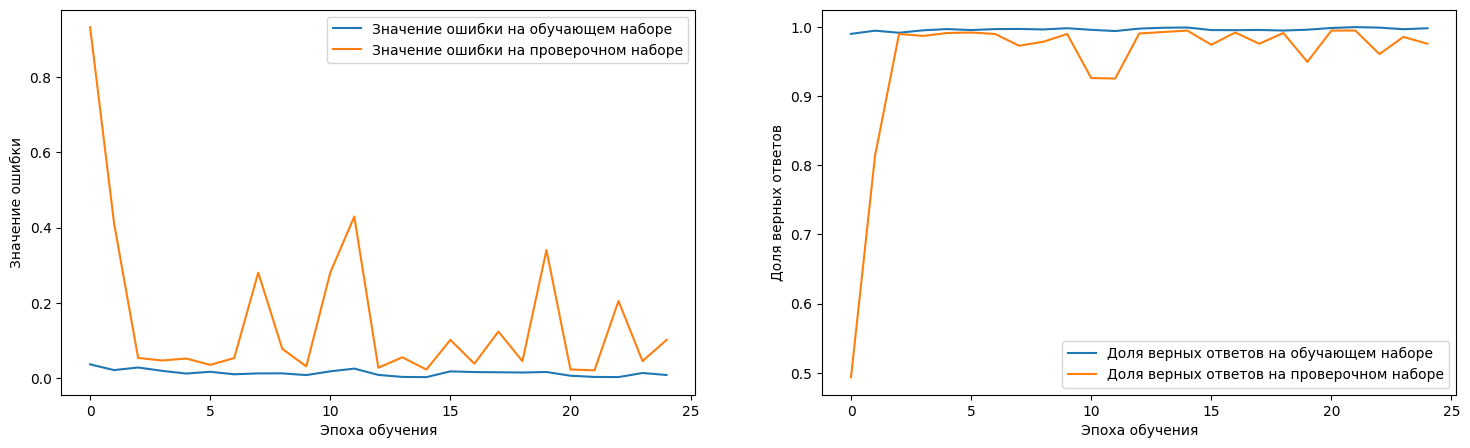

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model_conv = load_model("/content/drive/MyDrive/model/best_model3.h5")

In [ ]:
scores = model_conv.evaluate(x_test, y_test, verbose=1)
print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

23/23 [==============================] - 4s 67ms/step - loss: 0.0234 - accuracy: 0.9929
[0.02338985726237297, 0.9929278492927551]
Доля верных ответов на тестовых данных, в процентах: 99.2928%


In [ ]:
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Получение предсказанных значений модели для тестового набора данных
# y_pred = model.predict(test_a_generator)
y_pred = model_conv.predict(x_test)

#y_pred = np.round(y_pred).flatten()                    # округление до целых чисел и преобразование в одномерный массив

# Получение истинных значений тестового набора данных
# y_test = test_a_generator.classes
y_true = y_test

23/23 [==============================] - 1s 46ms/step


In [ ]:
# x = np.expand_dims(x, axis=0)
x1 =  np.expand_dims(x_test[20], axis=0)
# Проверка формы данных
print(x1.shape)

(1, 64, 128, 3)


In [ ]:
# Распознавание примера
prediction = model_conv.predict(x1)
print(prediction)

1/1 [==============================] - 0s 286ms/step
[[1.3388449e-26 1.4596891e-15 1.0000000e+00]]


In [ ]:
pred = np.argmax(y_true[20])
print(f'Распознанный класс: {pred}')
pred

Распознанный класс: 2


2

In [ ]:
from pandas.core.arrays.arrow import array
true_y= []
pred_y =[]
for i in range(len(y_true)):
  true_y.append(np.argmax(y_true[i]))
  pred_y.append(np.argmax(y_pred[i]))
true = np.array(true_y)
pred = np.array(pred_y)

print(true[1:5])
print(pred[1:5])

[0 0 1 0]
[0 0 1 0]


In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(true, pred)

print(cm)

[[217   2   0]
 [  2 273   0]
 [  0   1 212]]


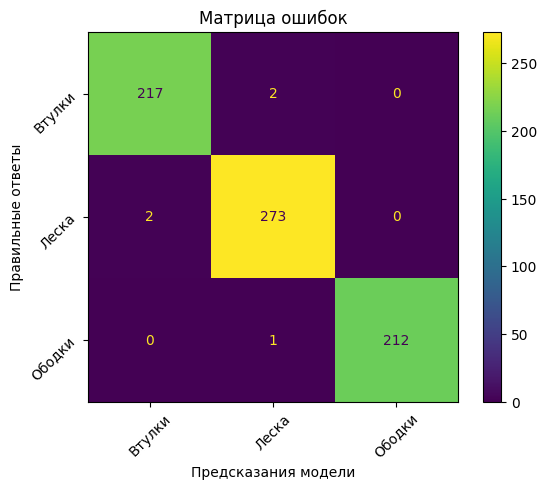

In [ ]:
# Построение confusion matrix
#cm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(true, pred)
TEST_CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
display_label = np.arange(len(TEST_CLASS_LIST))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_label)
disp.plot()

plt.title('Матрица ошибок')
plt.xticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.yticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')
plt.show()

Использовалась модель представленная в матариалах УИИ:

Базовый блок | Сверточные нейронные сети
Размер изображений использовался:

IMG_WIDTH = 128 # Ширина изображения для нейросети

IMG_HEIGHT = 64 # Высота изображения для нейросети

Вывод: Доля верных ответов на тестовых данных была достигнута в процентах: 99.2928% , что говорит о возможности практического использования модели